In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ocelot as oc
import ocelot.adaptors.astra2ocelot as oca

In [3]:

import ARESlatticeStage3v1_9 as ares


In [55]:
particles = oc.generate_parray(sigma_x=175e-6, sigma_px=2e-5, sigma_y=175e-6, sigma_py=2e-5,
                    sigma_tau=1e-5, sigma_p=1e-4, chirp=0.01, charge=5e-9, nparticles=int(1e7), energy=0.13,
                    tau_trunc=None, tws=None)
parts = np.array([particles.x(),particles.px(),particles.y(),particles.py()]).transpose()

In [56]:
parts

array([[-5.58690601e-05,  9.65899288e-06, -1.56422094e-04,
        -2.25674834e-06],
       [ 5.72344890e-05, -2.42188081e-05,  1.69957642e-04,
        -1.89704906e-05],
       [-2.50528979e-05, -1.03835594e-06, -3.91167156e-05,
         1.35499067e-05],
       ...,
       [-1.54843062e-04,  7.15913341e-06, -7.56567847e-05,
        -1.60353111e-05],
       [-7.87545779e-06, -2.78990522e-05, -2.97507355e-04,
        -8.82421942e-06],
       [ 2.71709215e-04, -8.88300718e-06,  8.37942411e-06,
        -2.74017026e-05]])

In [57]:
sigma_x=175e-9
sigma_px=2e-7
sigma_y=175e-9
sigma_py=2e-7
mean = np.array([0,0,0,0])
r= 0
r_y = 0
cov = np.array([[sigma_x,r,0,0],[r,sigma_px,0,0],[0,0,sigma_y,r_y],[0,0,r_y,sigma_py]])
parts = np.random.multivariate_normal(mean=mean, cov=cov, size=int(1e7))

In [58]:
parts

array([[-2.47368675e-04,  1.21135205e-04,  3.80984116e-04,
        -9.46325676e-04],
       [ 8.08940480e-05, -2.42642187e-04, -1.20849122e-04,
         9.81514108e-04],
       [-1.00340601e-03,  5.02787139e-04, -1.01577426e-04,
        -4.49063165e-04],
       ...,
       [ 6.02138113e-04,  1.35199410e-04, -3.18065593e-04,
        -3.30404835e-04],
       [ 3.19941793e-05, -6.59009484e-04,  8.69070399e-05,
        -7.07712904e-04],
       [ 5.49050654e-04,  5.52337289e-05,  3.20469460e-04,
        -4.35602197e-04]])

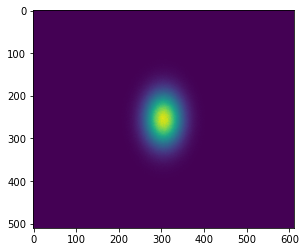

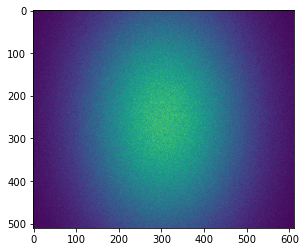

In [61]:
cell = []
check = False
for el in ares.cell:
    if el.id == "AREASOLA1": check = True
    if check: cell.append(el)
    if el.id == "AREAECHA1": check = False

Q1 = ares.areamqzm1
Q2 = ares.areamqzm2
Q3 = ares.areamqzm3

# Initial k values form the Ares operators.
# Q1_k1_0 = -5.07
# Q2_k1_0 = 2.66
# Q3_k1_0 = 4.75
Q1_k1_0 = 30
Q2_k1_0 = 0
Q3_k1_0 = 0

Q1.k1 = Q1_k1_0
Q2.k1 = Q2_k1_0
Q3.k1 = Q2_k1_0

dir(cell[0])
def quad(l,k):
    if k > 0:
        m = np.array([[np.cos(np.sqrt(k)*l),np.sin(np.sqrt(k)*l)/np.sqrt(k),0,0],
                      [-np.sqrt(k)*np.cos(np.sqrt(k)*l),np.cos(np.sqrt(k)*l),0,0],
                      [0,0,np.cosh(np.sqrt(k)*l),np.sinh(np.sqrt(k)*l)/np.sqrt(k)],
                      [0,0,np.sqrt(k)*np.sinh(np.sqrt(k)*l),np.cosh(np.sqrt(k)*l)]])
    elif k < 0:
        k = abs(k)
        m = np.array([[np.cosh(np.sqrt(k)*l),np.sinh(np.sqrt(k)*l)/np.sqrt(k),0,0],
                      [np.sqrt(k)*np.cosh(np.sqrt(k)*l),np.cosh(np.sqrt(k)*l),0,0],
                      [0,0,np.cos(np.sqrt(k)*l),np.sin(np.sqrt(k)*l)/np.sqrt(k)],
                      [0,0,-np.sqrt(k)*np.sin(np.sqrt(k)*l),np.cos(np.sqrt(k)*l)]])
    elif k == 0:
        m = np.array([[1,l,0,0],
                      [0,1,0,0],
                      [0,0,1,l],
                      [0,0,0,1]])
    return m

def drift(l):
    m = np.array([[1,l,0,0],
                      [0,1,0,0],
                      [0,0,1,l],
                      [0,0,0,1]])
    return m


M=[]
for elem in cell:
#     print(elem.id)
    if elem.id.startswith("AREAMQZM"):
#             print(elem.k1)
            M.append(quad(elem.l,elem.k1))
    else:
        M.append(drift(elem.l))

transfer_map = np.eye(4,4)

for m in M:
    transfer_map = np.matmul(transfer_map,m)
t_parts = np.dot(parts,transfer_map)

plot_parts(parts)
plot_parts(t_parts)

In [6]:
M=[]
for elem in cell:
    print(elem.id)
    if elem.id.startswith("AREAMQZM"):
            print(elem.k1)
            M.append(quad(elem.l,elem.k1))
    else:
        M.append(drift(elem.l))

transfer_map = np.eye(4,4)

for m in M:
    transfer_map = np.matmul(transfer_map,m)
t_parts = np.dot(parts,transfer_map)

AREASOLA1
Drift_AREASOLA1
AREAMQZM1
10
Drift_AREAMQZM1
AREAMQZM2
0
Drift_AREAMQZM2
AREAMCVM1
Drift_AREAMCVM1
AREAMQZM3
0
Drift_AREAMQZM3
AREAMCHM1
Drift_AREAMCHM1
AREABSCR1
Drift_AREABSCR1
AREAECHA1


In [34]:
def plot_parts(part):
    
    binning = 4
    screen_resolution = (int(2448 / binning), int(2040 / binning))
    meter_per_pixel = (3.5488e-6 * binning, 2.5003e-6 * binning)
    
    screen_bin_edges = (np.linspace(-screen_resolution[0]*meter_per_pixel[0]/2,
                                             screen_resolution[0]*meter_per_pixel[0]/2,
                                             screen_resolution[0]+1),
                                 np.linspace(-screen_resolution[1]*meter_per_pixel[1]/2,
                                             screen_resolution[1]*meter_per_pixel[1]/2,
                                             screen_resolution[1]+1))

    
    image = np.histogram2d(part[:,0], part[:,2],
                               bins=screen_bin_edges)[0].transpose()
    fig = plt.figure()
#     ax = fig.add_subplot(111)
#     ax.set_aspect('equal')
#     plt.xlim(-1e-3,1e-3)
#     plt.ylim(-1e-3,1e-3)
#     hist, _, _ = np.histogram2d(part[:,0],part[:,2], bins=100)
    plt.imshow(image)

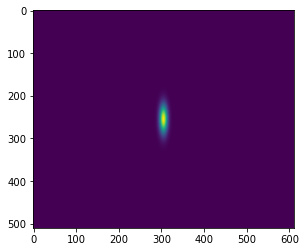

In [35]:
plot_parts(t_parts)

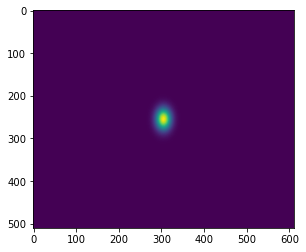

In [36]:
plot_parts(parts)

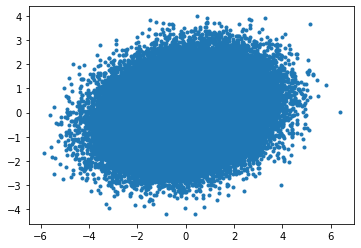

In [163]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.plot(part[:,0],part[:,1],linestyle='',marker='.')

In [164]:
np.std(part[:,0])**2

2.008308134238833

In [165]:
np.std(part[:,1])**2

1.0085537951844732